<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulation_Multiple_Hackers_with_Resetting_Times/blob/main/Probability_Exponential_Exponential_Exponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.seed(1)

In [8]:
k = 5

In [9]:
lambda_list = np.random.uniform(7,9,k)
lambda_list

array([7.83404401, 8.44064899, 7.00022875, 7.60466515, 7.29351178])

In [10]:
def Generate_Z(m, lambda_list):
    sum_of_x_list = []
    for i in range(len(lambda_list)):
        sum_of_x_list.append(np.sum(np.random.exponential(1/lambda_list[i], m)))
    Z = min(sum_of_x_list)
    return Z
def T_m(m, lambda_list, delta, eta):
    sum_of_time = 0
    sum_of_w = 0
    y = np.random.exponential(1/delta)
    w = np.random.exponential(1/eta)
    Z_m = Generate_Z(m, lambda_list)
    while Z_m > y:
        sum_of_time = sum_of_time + y + w
        sum_of_w += w
        Z_m = Generate_Z(m, lambda_list)
        y = np.random.exponential(1/delta)
        w = np.random.exponential(1/eta)
    return sum_of_time + Z_m, sum_of_w


In [29]:
def P_mt1(t, m_list, lambda_list, delta, eta, N=15000): # 15000
    res = np.repeat(np.nan, N)
    Prob = np.repeat(np.nan, len(m_list))
    for i in range(len(m_list)):
        for j in range(N):
             res[j] = t < T_m(m_list[i], lambda_list, delta, eta)[0]
        Prob[i] = np.sum(res)/N
        print('m = ', i+1)
    return Prob


m =  1
m =  2
m =  3
m =  4
m =  5
m =  6
m =  7
m =  8
m =  9
m =  10
m =  11
m =  12
m =  13
m =  14
m =  15
m =  16
m =  17
m =  18
m =  19
m =  20
m =  21
m =  22
m =  23
m =  24
m =  25
m =  26
m =  27
m =  28
m =  29
m =  30
m =  31
m =  32
m =  33
m =  34
m =  35
m =  36
m =  37
m =  38
m =  39
m =  40


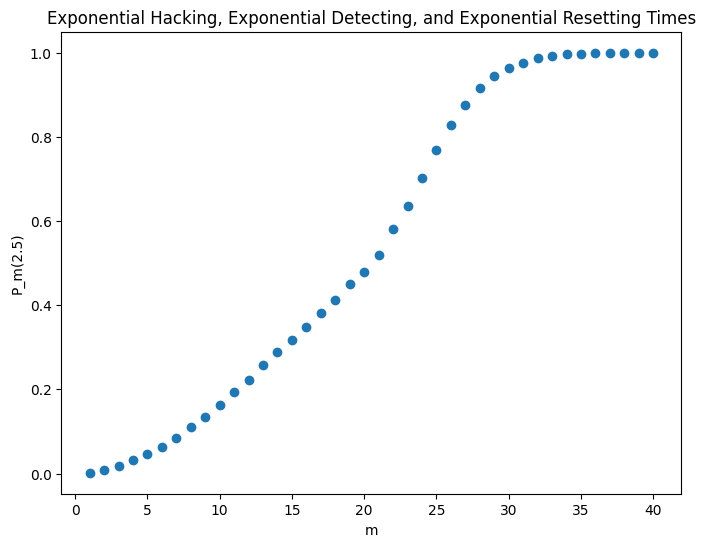

In [49]:
m = 40
m_list = range(1, m+1)
delta = 1/3
eta = 1/2
t_cross_section = 2.5
P_mt = P_mt1(t_cross_section, m_list, lambda_list, delta, eta)
fig = plt.figure(figsize=(8, 6))
plt.scatter(m_list, P_mt)
plt.xlabel(r'm')
plt.ylabel(r'P_m(2.5)')
plt.title('Exponential Hacking, Exponential Detecting, and Exponential Resetting Times')
plt.show()

# 3D

In [45]:
def P_mt2(t, m, lambda_list, delta, eta, N=10000): # N: iterations
    res = np.repeat(np.nan, N)
    for j in range(N):
        res[j] = t < T_m(m, lambda_list, delta, eta)[0]
    Prob = np.sum(res)/N
    return Prob

In [46]:

t = np.array(np.linspace(0.1, 10, len(m_list)))
m_axis = np.repeat(np.nan, len(m_list)*len(t))
t_axis = np.repeat(np.nan, len(m_list)*len(t))
P_axis = np.repeat(np.nan, len(m_list)*len(t))
index = 0
for i in range(len(m_list)):
    for j in range(len(t)):
        m_axis[index] = m_list[i]
        t_axis[index] = t[j]
        P_axis[index] = P_mt2(t_axis[index], int(m_axis[index]), lambda_list, delta, eta)
        index += 1
    print(i+1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


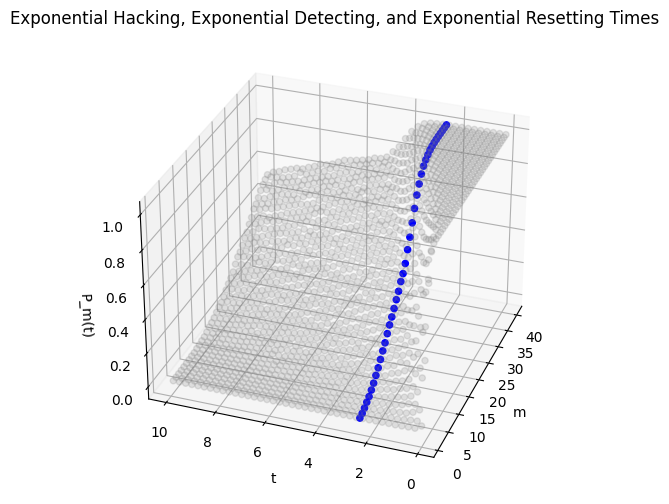

In [50]:

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(m_axis, t_axis, P_axis, alpha=0.2, c='grey')
ax.scatter3D(m_list, np.repeat(t_cross_section, len(m_list)), P_mt, alpha=1, c='blue')
ax.view_init(30, 200)
ax.set_yticks(np.linspace(0, 10, 6))
ax.set_xlabel('m')
ax.set_ylabel('t')
ax.set_zlabel(r'P_m(t)')
ax.set_title('Exponential Hacking, Exponential Detecting, and Exponential Resetting Times')
plt.show()
